<a href="https://colab.research.google.com/github/FaisalTahair/animal-classifier/blob/main/animal-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHECKING THE DEPENDENCIES:**

In [23]:
import tensorflow as tf
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from google.colab import files
from google.colab import drive
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/MyDrive/dataset/'


In [6]:
os.listdir(dataset_path)

['Zebra',
 'Panda',
 'Elephant',
 'Tiger',
 'Lion',
 'Horse',
 'Kangaroo',
 'Dog',
 'Giraffe',
 'Dolphin',
 'Bird',
 'Cow',
 'Cat',
 'Deer',
 'Bear']

In [7]:
#Data preprocessing
def preprocess_images(image_folder, image_size=(224, 224)):
    images, labels = [], []
    for label in os.listdir(image_folder):
        label_path = os.path.join(image_folder, label)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            images.append(img / 255.0)
            labels.append(label)
    return np.array(images), np.array(labels)
dataset_path = '/content/drive/MyDrive/dataset/'
images, labels = preprocess_images(dataset_path)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (1944, 224, 224, 3)
Labels shape: (1944,)


In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1360, 224, 224, 3)
Validation data shape: (292, 224, 224, 3)
Test data shape: (292, 224, 224, 3)


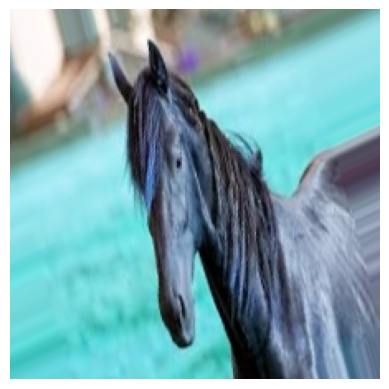

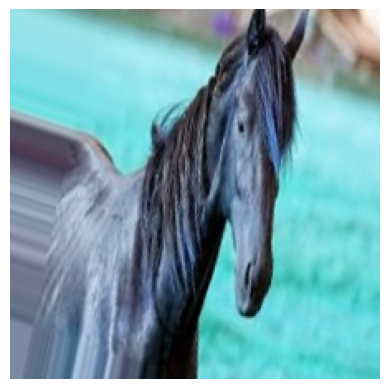

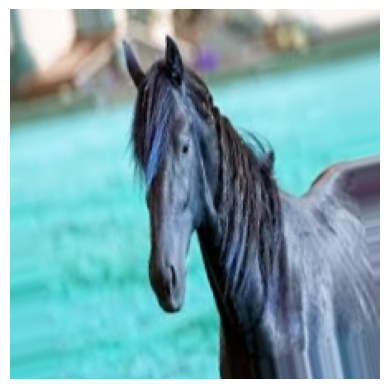

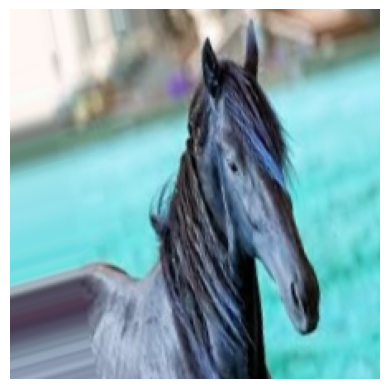

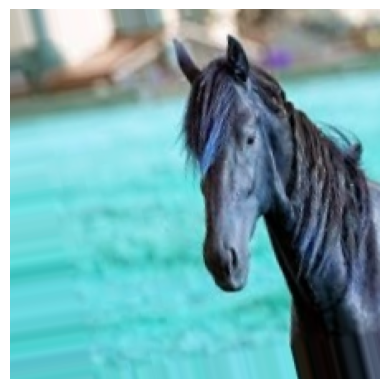

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)
sample_image = X_train[0]
sample_image = np.expand_dims(sample_image, axis=0)
for i in range(5):
    augmented_image = next(datagen.flow(sample_image, batch_size=1))[0]
    plt.imshow(augmented_image)
    plt.axis('off')
    plt.show()

In [10]:
num_classes = len(os.listdir('/content/drive/MyDrive/dataset/'))


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print("Encoded training labels:", y_train[:10])
print("Classes:", label_encoder.classes_)

Encoded training labels: [ 9  2  1  5  1  4  9  1  8 13]
Classes: ['Bear' 'Bird' 'Cat' 'Cow' 'Deer' 'Dog' 'Dolphin' 'Elephant' 'Giraffe'
 'Horse' 'Kangaroo' 'Lion' 'Panda' 'Tiger' 'Zebra']


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.0850 - loss: 3.0598 - val_accuracy: 0.2740 - val_loss: 2.3785
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.2410 - loss: 2.3990 - val_accuracy: 0.4932 - val_loss: 2.0634
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3593 - loss: 2.0766 - val_accuracy: 0.6130 - val_loss: 1.7371
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5086 - loss: 1.7423 - val_accuracy: 0.7192 - val_loss: 1.4307
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.5920 - loss: 1.4946 - val_accuracy: 0.7500 - val_loss: 1.2222
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.6788 - loss: 1.2048 - val_accuracy: 0.7740 - val_loss: 1.0380
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6995 - loss: 1.0977 - val_accuracy: 0.7877 - val_loss: 0.9258
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7669 - loss: 0.9001 - val_accuracy: 0.7945 - val_loss:

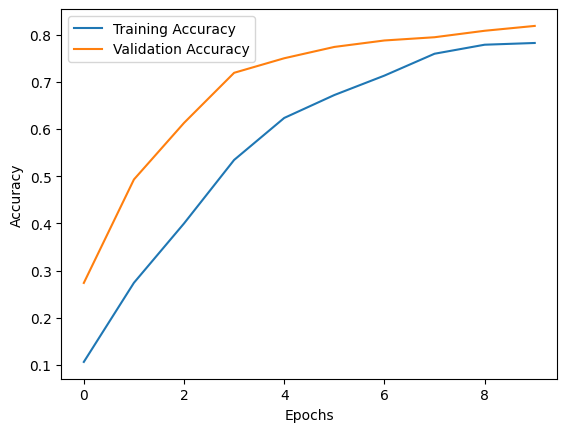

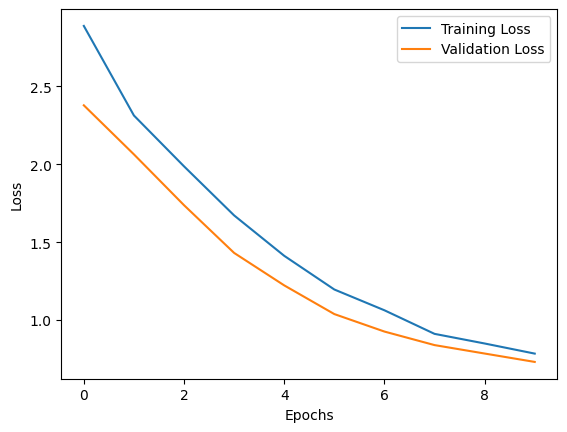

In [12]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    batch_size=32)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Short analysis:

#from above graph --> The model is learning properly.

#It is not just memorizing but actually understanding the patterns.

#No overfitting and no underfitting happening.

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8588 - loss: 0.5930
Test Loss: 0.6135194897651672
Test Accuracy: 0.8630136847496033


In [21]:

model.save('animal_classifier.keras')

